**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [3]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [4]:
# Load Data
file_path = 'GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [5]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [6]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [7]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [8]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [ ]:
# # OLD Lines
# # 3. Define the LSTM Model
# # from keras.optimizers import Adam
# model = Sequential()

# # --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
# model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units' 300,
# model.add(Dropout(0.2))  # Experiment with dropout for regularization

# model.add(LSTM(units=100, return_sequences=True))  # <-- Add another LSTM layer 300
# model.add(Dropout(0.2))

# model.add(LSTM(units=100, return_sequences=False))  # <-- Add another LSTM layer 300
# model.add(Dropout(0.1))

# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mean_absolute_error')

# # optimizer = Adam(learning_rate=0.001)
# # model.compile(optimizer=optimizer, loss='mean_squared_error')

In [9]:
# Define the LSTM Model
model = Sequential()

# First LSTM layer with more units and return sequences
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))  # Increased units from 50 to 100
model.add(Dropout(0.3))  # Increased dropout from 0.2 to 0.3

# Second LSTM layer with increased units
model.add(LSTM(units=100, return_sequences=True))  # Added return_sequences=True to stack another LSTM layer
model.add(Dropout(0.3))

# Third LSTM layer (newly added)
model.add(LSTM(units=50, return_sequences=False))  # Added a third LSTM layer with 50 units
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1))

# Compile the model with a different optimizer and loss function for experimentation
model.compile(optimizer='adam', loss='mean_squared_error')  # Changed loss to 'mean_squared_error'

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [10]:
# Train the Model with modified epochs and batch size
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)  # Increased epochs to 50 and batch_size to 64
# <-- Experiment with 'epochs' and 'batch_size' -> 16, 12, 28 // 70

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step - loss: 0.2982
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0430
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 0.0379
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step - loss: 0.0519
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - loss: 0.0341
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - loss: 0.0290
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - loss: 0.0327
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - loss: 0.0217
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - loss: 0.0259
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - loss: 0.0193
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - loss: 0.0225
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - loss: 0.0197
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - loss: 0.0178
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - loss: 0.0193
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - loss: 0.0187
Epoch 16/50
3/3 ━━━

In [11]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step


In [12]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

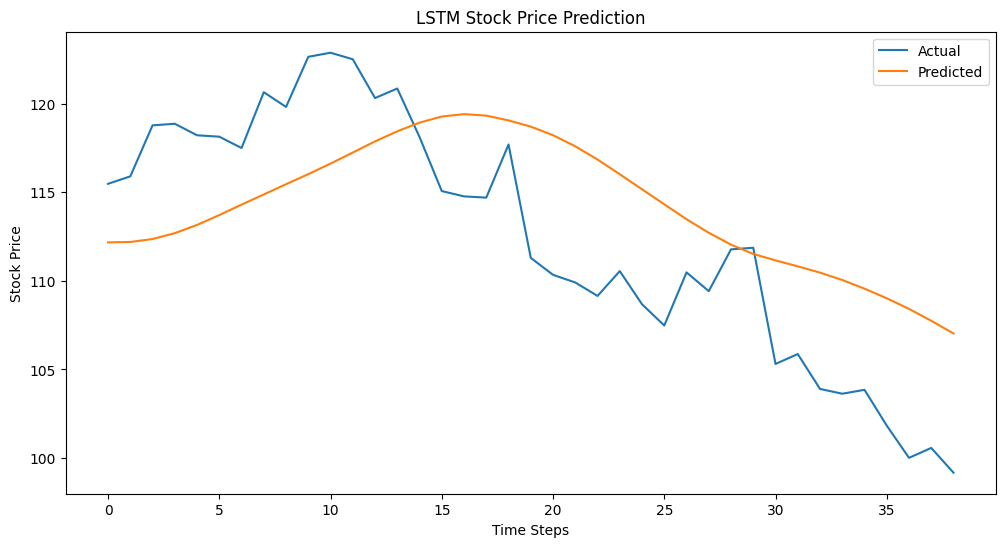

In [13]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?


01. What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?

  Normalizing the 'Close' prices makes the data smaller and more consistent, which helps the LSTM model learn better and faster.

02. What is the purpose of the Dropout layer in the LSTM model?

  The Dropout layer helps prevent the model from learning too much from the training data, which helps it work better with new data it hasn’t seen before.

03. In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?

 If the predicted line closely follows the actual line, it means the model is doing a good job of predicting the stock prices.
